In [3]:
# prompt: using pandas load unified_sensor_dataset.pkl into a dataframe

import pandas as pd

df = pd.read_pickle('unified_sensor_dataset.pkl')
df.head()

,OFFCHIP_SENSIMOX_SnAu_150_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_200_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_250_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_300_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_350_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_400_200.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_150_78125.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_200_78125.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_250_78125.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_300_78125.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_350_78125.0_IN-PHASE,OFFCHIP_SENSIMOX_SnAu_400_78125.0_IN-PHASE,ONCHIP_ALUMINUM_OXIDE_OUT4_IN-PHASE,ONCHIP_ALUMINUM_OXIDE_OUT4_QUADRATURE,ONCHIP_ALUMINUM_OXIDE_OUT7_IN-PHASE,ONCHIP_ALUMINUM_OXIDE_OUT7_QUADRATURE,LABEL,SOURCE_FILE,SOURCE_DIRECTORY
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CALCIUM_NITRATE,Experiment_21-05-2024_12-33_SCA_CALCIUM_NITRAT...,CALCIUM_NITRATE
1,4.0,6.0,12.0,22.0,6.0,12.0,-5.0,-3.0,11.0,17.0,6.0,12.0,-139.0,90.0,-585.0,444.0,CALCIUM_NITRATE,Experiment_21-05-2024_12-33_SCA_CALCIUM_NITRAT...,CALCIUM_NITRATE
2,7.0,11.0,25.0,47.0,10.0,20.0,2.0,-3.0,13.0,56.0,11.0,20.0,-139.0,102.0,-585.0,454.0,CALCIUM_NITRATE,Experiment_21-05-2024_12-33_SCA_CALCIUM_NITRAT...,CALCIUM_NITRATE
3,8.0,13.0,30.0,56.0,12.0,25.0,2.0,-3.0,11.0,56.0,11.0,25.0,-44.0,19.0,-176.0,96.0,CALCIUM_NITRATE,Experiment_21-05-2024_12-33_SCA_CALCIUM_NITRAT...,CALCIUM_NITRATE
4,8.0,15.0,34.0,69.0,15.0,30.0,5.0,2.0,18.0,58.0,14.0,29.0,-39.0,21.0,-152.0,107.0,CALCIUM_NITRATE,Experiment_21-05-2024_12-33_SCA_CALCIUM_NITRAT...,CALCIUM_NITRATE


In [4]:
print('RIMOZIONE VALORI NULLI E DUPLICATI')

print('PRIMA:')
print(f'righe con valori nulli: {df.isna().any(axis=1).sum()}')
print(f'righe duplicate in generale: {df.duplicated().sum()}')
print(f'righe duplicate per rilevazioni: {df.duplicated(subset=df.columns[:16]).sum()}')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=df.columns[:16], inplace=True)
print('DOPO:')
print(f'righe con valori nulli: {df.isna().any(axis=1).sum()}')
print(f'righe duplicate in generale: {df.duplicated().sum()}')
print(f'righe duplicate per rilevazioni: {df.duplicated(subset=df.columns[:16]).sum()}')

RIMOZIONE VALORI NULLI E DUPLICATI
PRIMA:
righe con valori nulli: 1
righe duplicate in generale: 27
righe duplicate per rilevazioni: 907
DOPO:
righe con valori nulli: 0
righe duplicate in generale: 0
righe duplicate per rilevazioni: 0


In [5]:
# TABLE LABEL CLEANING

df.drop(columns=['SOURCE_FILE','SOURCE_DIRECTORY'], inplace=True)
df.head()

new_columns = {}
for i, col in enumerate(df.columns):
  if col != 'LABEL':
    new_columns[col] = f'Sen_{i+1}'
  else:
    new_columns[col] = col
df.rename(columns=new_columns, inplace=True)
df.head()

,Sen_1,Sen_2,Sen_3,Sen_4,Sen_5,Sen_6,Sen_7,Sen_8,Sen_9,Sen_10,Sen_11,Sen_12,Sen_13,Sen_14,Sen_15,Sen_16,LABEL
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CALCIUM_NITRATE
1,4.0,6.0,12.0,22.0,6.0,12.0,-5.0,-3.0,11.0,17.0,6.0,12.0,-139.0,90.0,-585.0,444.0,CALCIUM_NITRATE
2,7.0,11.0,25.0,47.0,10.0,20.0,2.0,-3.0,13.0,56.0,11.0,20.0,-139.0,102.0,-585.0,454.0,CALCIUM_NITRATE
3,8.0,13.0,30.0,56.0,12.0,25.0,2.0,-3.0,11.0,56.0,11.0,25.0,-44.0,19.0,-176.0,96.0,CALCIUM_NITRATE
4,8.0,15.0,34.0,69.0,15.0,30.0,5.0,2.0,18.0,58.0,14.0,29.0,-39.0,21.0,-152.0,107.0,CALCIUM_NITRATE


In [6]:
print('ENCODING')

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the Label column
le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['LABEL'])
df.drop(columns=['LABEL'], inplace=True)

# Get the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Stampare la mappa in forma tabellare
label_map_df = pd.DataFrame(list(label_mapping.items()), columns=['Label', 'Label_encoded'])
label_map_df


ENCODING


,Label,Label_encoded
0,ACETIC_ACID,0
1,ACETONE,1
2,AIR,2
3,AMMONIA,3
4,AMMONIUM_CHLORIDE,4
5,APPLE_VINEGAR,5
6,BALSAMIC_VINEGAR,6
7,BIOETHANOL,7
8,BUTANE,8
9,CALCIUM_NITRATE,9


In [7]:
df.head()

,Sen_1,Sen_2,Sen_3,Sen_4,Sen_5,Sen_6,Sen_7,Sen_8,Sen_9,Sen_10,Sen_11,Sen_12,Sen_13,Sen_14,Sen_15,Sen_16,Label_encoded
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
1,4.0,6.0,12.0,22.0,6.0,12.0,-5.0,-3.0,11.0,17.0,6.0,12.0,-139.0,90.0,-585.0,444.0,9
2,7.0,11.0,25.0,47.0,10.0,20.0,2.0,-3.0,13.0,56.0,11.0,20.0,-139.0,102.0,-585.0,454.0,9
3,8.0,13.0,30.0,56.0,12.0,25.0,2.0,-3.0,11.0,56.0,11.0,25.0,-44.0,19.0,-176.0,96.0,9
4,8.0,15.0,34.0,69.0,15.0,30.0,5.0,2.0,18.0,58.0,14.0,29.0,-39.0,21.0,-152.0,107.0,9


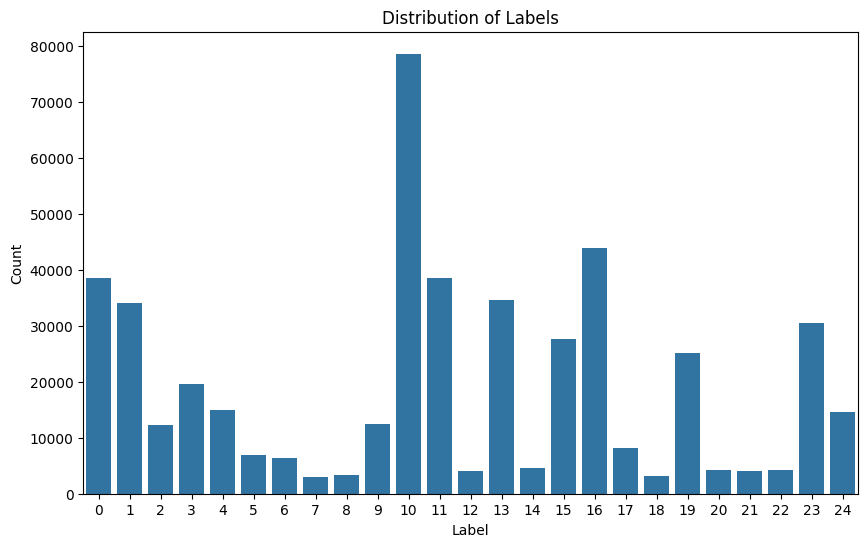

In [8]:
# prompt: plot the df label distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'LABEL' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label_encoded')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [9]:
print(f'dimensioni: {df.shape}')

dimensioni: (477548, 17)


In [10]:
# Split features - labels
X = df.drop('Label_encoded', axis=1)
y = df['Label_encoded']

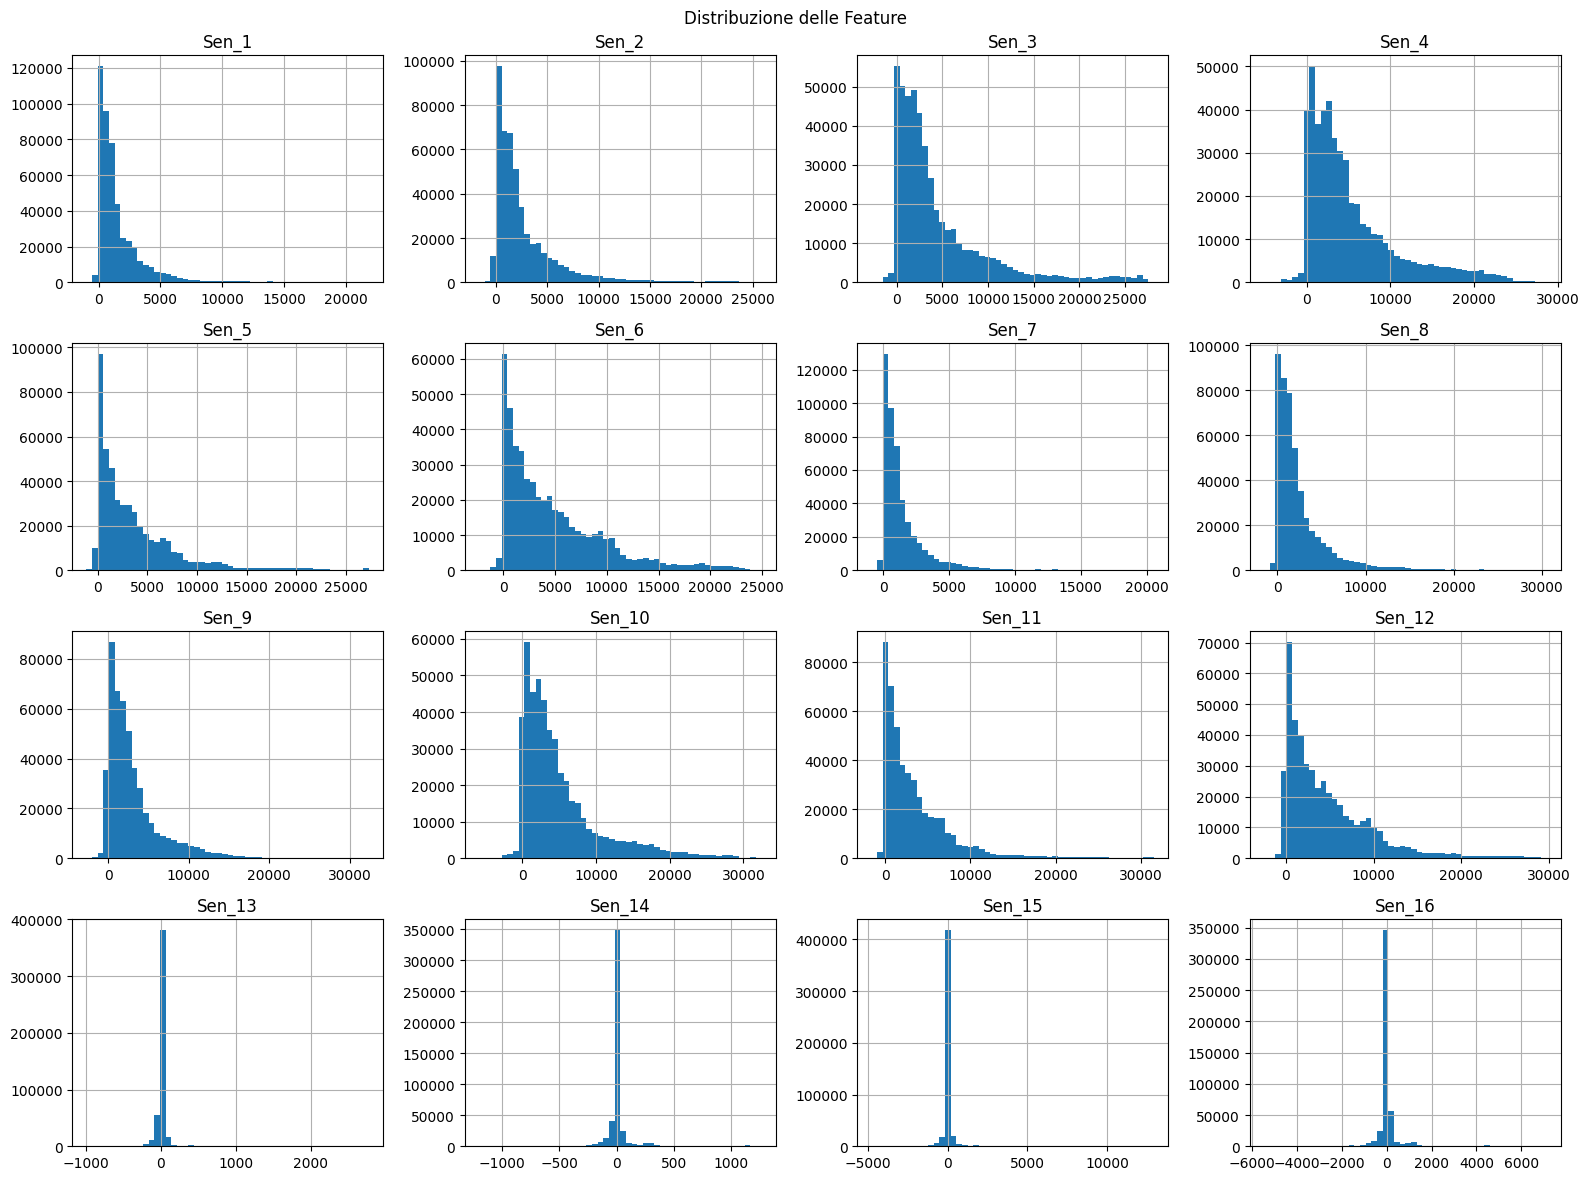

In [13]:
# Distribuzione features
X.hist(bins=50, figsize=(16,12))
plt.suptitle("Distribuzione delle Feature")
plt.tight_layout()
plt.show()

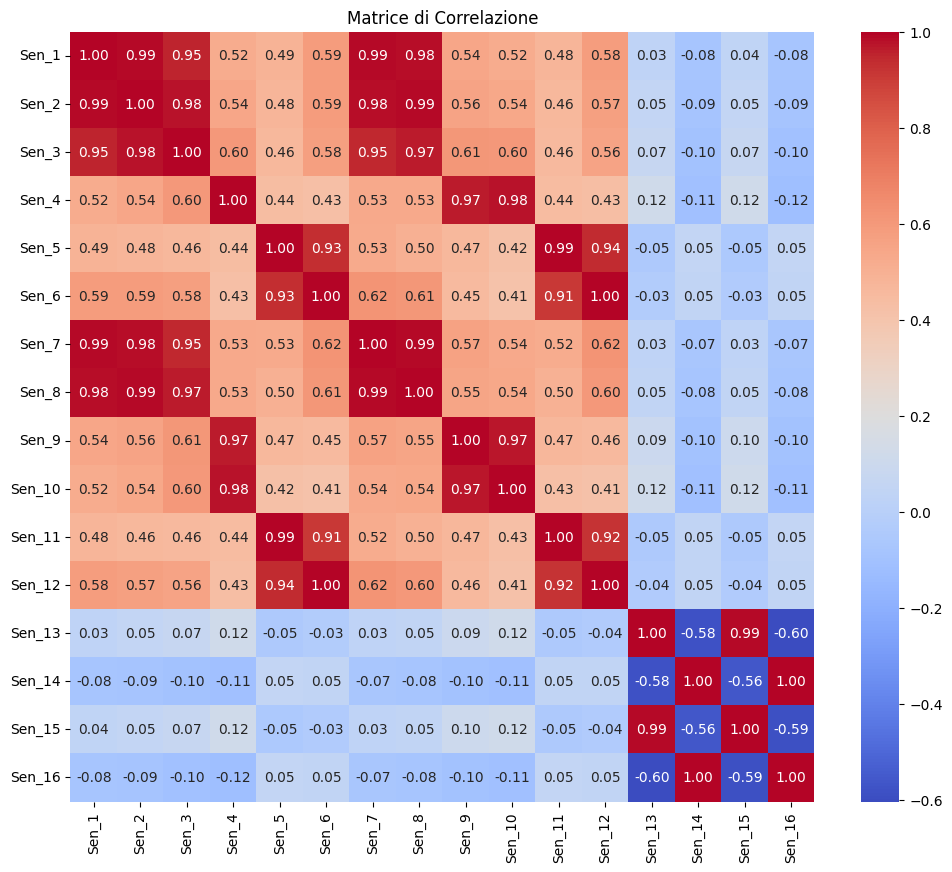

In [14]:
# Correlazione tra feature
corr = X.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice di Correlazione")
plt.show()

KeyboardInterrupt: 

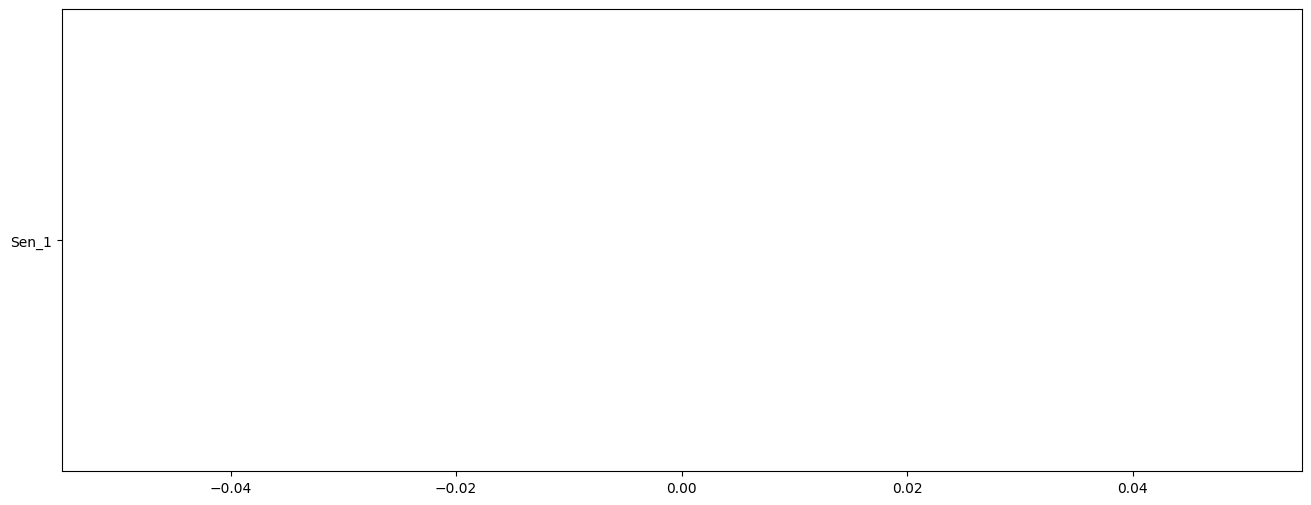

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(data=X, orient="h")  # or 'v' per verticale
plt.title("Boxplot delle 16 feature")
plt.tight_layout()
plt.show()

In [15]:
df.to_pickle('data/preprocessed_data.pkl')